In [43]:
import os 
import time 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from PIL import Image 
import cv2
import warnings 
warnings.filterwarnings('ignore')



In [2]:
try: 
    import torch 
    print(f"PyTorch version: {torch.version}") 
    print(f"CUDA available: {torch.cuda.is_available()}") 
    if torch.cuda.is_available(): 
        print(f"CUDA version: {torch.version.cuda}") 
        print(f"GPU: {torch.cuda.get_device_name(0)}") 
except ImportError: 
    print("PyTorch not installed, GPU acceleration might not be available")


try: 
    from deepface import DeepFace 
    print(f"DeepFace version: {DeepFace.__version__}") 
except ImportError:
    print("Installing DeepFace...") 
    !pip install deepface
    from deepface import DeepFace 
    print(f"DeepFace version: {DeepFace.__version__}")



PyTorch version: <module 'torch.version' from '/Users/ritherthemuncher/Desktop/server_facereg/facereg_env/lib/python3.11/site-packages/torch/version.py'>
CUDA available: False
DeepFace version: 0.0.93


In [44]:
SAMPLE_DIR = "sample_images" 
if not os.path.exists(SAMPLE_DIR): 
    os.makedirs(SAMPLE_DIR)
    print(f"Created directory: {SAMPLE_DIR}")
    print("Please add test images to this directory before running the tests") 
else: 
    img_count = len([f for f in os.listdir(SAMPLE_DIR) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]) 
    print(f"Found {img_count} images in {SAMPLE_DIR}")



Found 19 images in sample_images


In [ ]:
import os
import requests
from PIL import Image
from io import BytesIO
import time

def download_sample_images(target_dir="sample_images", num_images=5):
    """Download DeepFace test dataset images"""
    image_urls = [
        "https://raw.githubusercontent.com/serengil/deepface/master/tests/dataset/img1.jpg",
        "https://raw.githubusercontent.com/serengil/deepface/master/tests/dataset/img2.jpg", 
        "https://raw.githubusercontent.com/serengil/deepface/master/tests/dataset/img3.jpg",
        "https://raw.githubusercontent.com/serengil/deepface/master/tests/dataset/img4.jpg",
        "https://raw.githubusercontent.com/serengil/deepface/master/tests/dataset/img5.jpg",
        "https://raw.githubusercontent.com/serengil/deepface/master/tests/dataset/img6.jpg",
        "https://raw.githubusercontent.com/serengil/deepface/master/tests/dataset/img7.jpg",
        "https://raw.githubusercontent.com/serengil/deepface/master/tests/dataset/img8.jpg",
        "https://raw.githubusercontent.com/serengil/deepface/master/tests/dataset/img9.jpg",
        "https://raw.githubusercontent.com/serengil/deepface/master/tests/dataset/img10.jpg"
    ]
    
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)
    
    downloaded = 0
    for i, url in enumerate(image_urls[:num_images]):
        try:
            response = requests.get(url, timeout=10)
            if response.status_code == 200:
                img = Image.open(BytesIO(response.content))
                filename = os.path.join(target_dir, f"deepface_sample_{i+1}.jpg")
                img.save(filename)
                print(f"✓ Downloaded: {filename}")
                downloaded += 1
            else:
                print(f"✗ Failed to download {url}: Status code {response.status_code}")
        except Exception as e:
            print(f"✗ Error downloading {url}: {e}")
        
        # Small delay to be respectful to the server
        time.sleep(0.1)
    
    print(f"Downloaded {downloaded} DeepFace sample images to {target_dir}")
    return downloaded > 0

def download_diverse_test_images(target_dir="sample_images", num_images=10):
    """Download a more diverse set of test images from various sources"""
    
    # Unsplash images (free to use)
    diverse_urls = [
        # Single faces - different angles/lighting
        "https://images.unsplash.com/photo-1507003211169-0a1dd7228f2d?w=400&h=400&fit=crop&crop=face",
        "https://images.unsplash.com/photo-1494790108755-2616b9d1ab60?w=400&h=400&fit=crop&crop=face",
        "https://images.unsplash.com/photo-1472099645785-5658abf4ff4e?w=400&h=400&fit=crop&crop=face",
        "https://images.unsplash.com/photo-1500648767791-00dcc994a43e?w=400&h=400&fit=crop&crop=face",
        "https://images.unsplash.com/photo-1438761681033-6461ffad8d80?w=400&h=400&fit=crop&crop=face",
        
        "https://images.unsplash.com/photo-1529626455594-4ff0802cfb7e?w=600&h=400&fit=crop",
        "https://images.unsplash.com/photo-1511632765486-a01980e01a18?w=600&h=400&fit=crop",
        "https://images.unsplash.com/photo-1543269664-7eef42226a21?w=600&h=400&fit=crop",
        
        # Challenging conditions
        "https://images.unsplash.com/photo-1506794778202-cad84cf45f1d?w=400&h=400&fit=crop&crop=face",  # Profile view
        "https://images.unsplash.com/photo-1507591064344-4c6ce005b128?w=400&h=400&fit=crop&crop=face",  # Different lighting
    ]
    
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)
    
    downloaded = 0
    for i, url in enumerate(diverse_urls[:num_images]):
        try:
            response = requests.get(url, timeout=10)
            if response.status_code == 200:
                img = Image.open(BytesIO(response.content))
                filename = os.path.join(target_dir, f"diverse_sample_{i+1}.jpg")
                img.save(filename)
                print(f"✓ Downloaded: {filename}")
                downloaded += 1
            else:
                print(f"✗ Failed to download {url}: Status code {response.status_code}")
        except Exception as e:
            print(f"✗ Error downloading {url}: {e}")
        
        time.sleep(0.2)  # Be respectful to Unsplash
    
    print(f"Downloaded {downloaded} diverse sample images to {target_dir}")
    return downloaded > 0



In [45]:
print("-" * 50)
print("Download summary:") 
print(f"- Sample directory: {SAMPLE_DIR}") 
total_images = len([f for f in os.listdir(SAMPLE_DIR) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
print(f"- Total images in directory: {total_images}")



--------------------------------------------------
Download summary:
- Sample directory: sample_images
- Total images in directory: 19


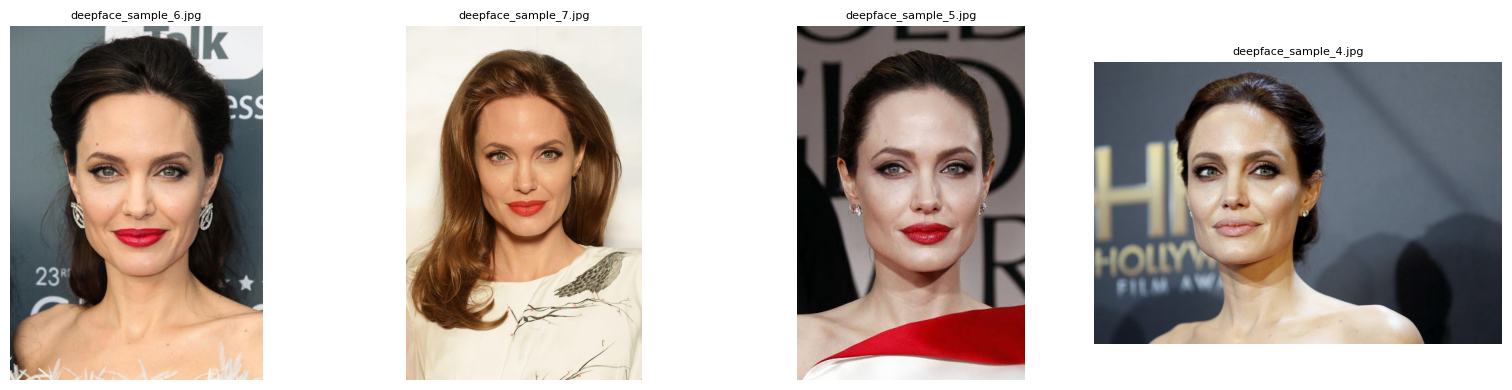

In [46]:
sample_files = [f for f in os.listdir(SAMPLE_DIR) if f.lower().endswith(('.png', '.jpg', '.jpeg'))] 
if sample_files:
    fig, axes = plt.subplots(1, min(4, len(sample_files)), figsize=(16, 4)) 
    if len(sample_files) == 1: 
         axes = [axes] 

for i, ax in enumerate(axes):
    if i < len(sample_files):
        img = plt.imread(os.path.join(SAMPLE_DIR, sample_files[i]))
        ax.imshow(img)
        ax.set_title(sample_files[i], fontsize=8)
        ax.axis('off')

plt.tight_layout()
plt.show()

# 1. Face Detection Evaluation

There are a few face detectors available in Deepface that we can choose from

- OpenCV
- mtcnn
- retinaface
- ssd
- yolov8
- mediapipe

Here I would love to measure: detection speed, success rate, and number of faces detected



In [47]:
def evaluate_detector(detector_name, sample_images, num_runs=3):
    """Evaluate face detector performance""" 
    results = { "detector": detector_name, "faces_detected": 0, "detection_time": [], "failures": 0 }

    print(f"Warming up {detector_name} detector...")

    try: 
        _ = DeepFace.extract_faces(sample_images[0], detector_backend=detector_name, enforce_detection=False)
    except Exception as e:
        print(f"Error during warm-up: {e}")
    for i, img_path in enumerate(sample_images):
        print(f"  Testing image {i+1}/{len(sample_images)} with {detector_name}...", end="")
        start_time = time.time()
        for run in range(num_runs):
            try:
                start_time = time.time()
                faces = DeepFace.extract_faces(img_path, detector_backend=detector_name, enforce_detection=False)
                end_time = time.time()
                
                results["detection_time"].append(end_time - start_time)
                if run == 0:
                    num_faces = len(faces)
                    results["faces_detected"] += num_faces
                    print(f" Found {num_faces} faces in {results['detection_time'][-1]:.3f}s")
            except Exception as e:
                if run == 0: 
                    results["failures"] += 1
                    print(f" Error: {str(e)}")

    results["avg_detection_time"] = np.mean(results["detection_time"]) if results["detection_time"] else 0
    results["avg_fps"] = 1.0 / results["avg_detection_time"] if results["avg_detection_time"] > 0 else 0
    results["success_rate"] = 1.0 - (results["failures"] / len(sample_images))

    print(f"\nDetector: {detector_name}")
    print(f"  Success Rate: {results['success_rate']:.2%}")
    print(f"  Avg. Detection Time: {results['avg_detection_time']:.4f}s")
    print(f"  Avg. FPS: {results['avg_fps']:.2f}")
    print(f"  Total Faces Detected: {results['faces_detected']}")

    return results


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from deepface import DeepFace
import time
import cv2

def evaluate_detector(detector_name, sample_images):
    detection_times = []
    faces_detected_counts = []
    successful_detections = 0
    
    print(f"Evaluating {detector_name}...")
    
    for i, img in enumerate(sample_images):
        try:
            start_time = time.time()
            
            result = DeepFace.extract_faces(
                img_path=img,
                detector_backend=detector_name,
                enforce_detection=False
            )
            
            end_time = time.time()
            detection_time = end_time - start_time
            detection_times.append(detection_time)
            
            # Count faces detected
            faces_count = len(result) if result else 0
            faces_detected_counts.append(faces_count)
            
            if faces_count > 0:
                successful_detections += 1
                
            print(f"  Image {i+1}: {faces_count} faces, {detection_time:.3f}s")
            
        except Exception as e:
            print(f"  Image {i+1}: Failed - {str(e)}")
            detection_times.append(None)
            faces_detected_counts.append(0)
    
    # Calculate metrics
    valid_times = [t for t in detection_times if t is not None]
    avg_detection_time = np.mean(valid_times) if valid_times else float('inf')
    avg_fps = 1.0 / avg_detection_time if avg_detection_time > 0 else 0
    success_rate = successful_detections / len(sample_images)
    total_faces = sum(faces_detected_counts)
    
    return {
        'detector': detector_name,
        'avg_detection_time': avg_detection_time,
        'avg_fps': avg_fps,
        'success_rate': success_rate,
        'faces_detected': total_faces,
        'successful_detections': successful_detections,
        'total_images': len(sample_images)
    }

def create_performance_dashboard(detector_df):
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Average Detection Time (seconds)', 'Average FPS', 
                       'Success Rate (%)', 'Total Faces Detected'),
        specs=[[{"secondary_y": False}, {"secondary_y": False}],
               [{"secondary_y": False}, {"secondary_y": False}]]
    )
    
    df_sorted = detector_df.sort_values('avg_detection_time')
    
    colors = px.colors.qualitative.Set3[:len(df_sorted)]
    
    fig.add_trace(
        go.Bar(x=df_sorted['detector'], 
               y=df_sorted['avg_detection_time'],
               name='Detection Time',
               marker_color=colors,
               showlegend=False),
        row=1, col=1
    )
    
    fig.add_trace(
        go.Bar(x=df_sorted['detector'], 
               y=df_sorted['avg_fps'],
               name='FPS',
               marker_color=colors,
               showlegend=False),
        row=1, col=2
    )
    
    fig.add_trace(
        go.Bar(x=df_sorted['detector'], 
               y=df_sorted['success_rate'] * 100,
               name='Success Rate',
               marker_color=colors,
               showlegend=False),
        row=2, col=1
    )
    
    fig.add_trace(
        go.Bar(x=df_sorted['detector'], 
               y=df_sorted['faces_detected'],
               name='Faces Detected',
               marker_color=colors,
               showlegend=False),
        row=2, col=2
    )
    
    fig.update_layout(
        title_text="Face Detector Performance Comparison",
        title_x=0.5,
        height=800,
        showlegend=False
    )
    

    for i in range(1, 3):
        for j in range(1, 3):
            fig.update_xaxes(tickangle=45, row=i, col=j)
    

    fig.update_yaxes(title_text="Time (s)", row=1, col=1)
    fig.update_yaxes(title_text="FPS", row=1, col=2)
    fig.update_yaxes(title_text="Success Rate (%)", row=2, col=1)
    fig.update_yaxes(title_text="Count", row=2, col=2)
    
    return fig

def create_individual_plots(detector_df):

    df_sorted = detector_df.sort_values('avg_detection_time')
    
    plots = {}
    
    # 1. Detection Time
    plots['detection_time'] = px.bar(
        df_sorted, 
        x='detector', 
        y='avg_detection_time',
        title='Average Detection Time by Detector',
        labels={'avg_detection_time': 'Time (seconds)', 'detector': 'Detector'},
        color='avg_detection_time',
        color_continuous_scale='Viridis_r'
    )
    plots['detection_time'].update_layout(xaxis_tickangle=45)
    
    # 2. FPS
    plots['fps'] = px.bar(
        df_sorted.sort_values('avg_fps', ascending=False), 
        x='detector', 
        y='avg_fps',
        title='Average FPS by Detector',
        labels={'avg_fps': 'Frames Per Second', 'detector': 'Detector'},
        color='avg_fps',
        color_continuous_scale='Viridis'
    )
    plots['fps'].update_layout(xaxis_tickangle=45)
    
    plots['success_rate'] = px.bar(
        df_sorted.sort_values('success_rate', ascending=False), 
        x='detector', 
        y='success_rate',
        title='Success Rate by Detector',
        labels={'success_rate': 'Success Rate (0-1)', 'detector': 'Detector'},
        color='success_rate',
        color_continuous_scale='RdYlGn'
    )
    plots['success_rate'].update_layout(xaxis_tickangle=45)
    
    plots['faces_detected'] = px.bar(
        df_sorted.sort_values('faces_detected', ascending=False), 
        x='detector', 
        y='faces_detected',
        title='Total Faces Detected by Detector',
        labels={'faces_detected': 'Number of Faces', 'detector': 'Detector'},
        color='faces_detected',
        color_continuous_scale='Blues'
    )
    plots['faces_detected'].update_layout(xaxis_tickangle=45)
    
    return plots

def run_detector_evaluation(sample_images):

    available_detectors = [
        "opencv", "mtcnn", "retinaface", 
        "ssd", "yunet", "centerface"
    ]
    print(f"Testing with {len(sample_images)} sample images")
    print("=" * 50)

    detector_results = []

    for detector in available_detectors:
        try:
            result = evaluate_detector(detector, sample_images)
            detector_results.append(result)
            print(f"✓ {detector} completed successfully")
        except Exception as e:
            print(f"✗ Could not evaluate {detector}: {e}")
        print("-" * 30)

    if not detector_results:
        print("No valid detector results to display.")
        return None

    detector_df = pd.DataFrame(detector_results)

    print("\nDetector Performance Summary (Sorted by Speed):")
    summary_df = detector_df[['detector', 'avg_detection_time', 'avg_fps', 'success_rate', 'faces_detected']].copy()
    summary_df['success_rate'] = summary_df['success_rate'].round(3)
    summary_df['avg_detection_time'] = summary_df['avg_detection_time'].round(4)
    summary_df['avg_fps'] = summary_df['avg_fps'].round(2)

    print(summary_df.sort_values('avg_detection_time').to_string(index=False))

    print("\nGenerating interactive plots...")

    dashboard_fig = create_performance_dashboard(detector_df)
    dashboard_fig.show()

    individual_plots = create_individual_plots(detector_df)

    for plot_name, fig in individual_plots.items():
        fig.show()

    return detector_df, dashboard_fig, individual_plots

In [50]:
detector_df, dashboard, plots = run_detector_evaluation(
    [os.path.join(SAMPLE_DIR, f) for f in sample_files]
)



Testing with 19 sample images
Evaluating opencv...
  Image 1: 1 faces, 0.315s
  Image 2: 1 faces, 0.929s
  Image 3: 1 faces, 0.065s
  Image 4: 1 faces, 1.348s
  Image 5: 1 faces, 0.032s
  Image 6: 1 faces, 0.683s
  Image 7: 1 faces, 0.057s
  Image 8: 1 faces, 0.831s
  Image 9: 1 faces, 0.991s
  Image 10: 1 faces, 0.511s
  Image 11: 1 faces, 0.047s
  Image 12: 1 faces, 0.066s
  Image 13: 1 faces, 0.048s
  Image 14: 1 faces, 0.054s
  Image 15: 1 faces, 0.026s
  Image 16: 1 faces, 0.454s
  Image 17: 1 faces, 0.053s
  Image 18: 2 faces, 0.187s
  Image 19: 1 faces, 0.026s
✓ opencv completed successfully
------------------------------
Evaluating mtcnn...
  Image 1: 1 faces, 0.577s
  Image 2: 1 faces, 2.443s
  Image 3: 1 faces, 0.195s
  Image 4: 1 faces, 3.853s
  Image 5: 1 faces, 0.188s
  Image 6: 1 faces, 2.191s
  Image 7: 1 faces, 0.122s
  Image 8: 1 faces, 2.548s
  Image 9: 1 faces, 3.459s
  Image 10: 1 faces, 1.466s
  Image 11: 1 faces, 0.198s
  Image 12: 1 faces, 0.211s
  Image 13: 1 fa